## Visualize word frequencies using wordcloud
### Compare wordclouds for the training data categories and the predicted out-of-event test data categories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk import TweetTokenizer
from nltk.tokenize import word_tokenize
from yellowbrick.text import FreqDistVisualizer

In [23]:
michael = pd.read_pickle('../data/michael_predictions.pkl')

In [24]:
sandy_joplin = pd.read_pickle('../data/train3.pkl')

In [34]:
mystopwords = stopwords.words('english')
mystopwords.extend(['michael','twitter','hurricane','tornado','harvey','irma','joplin',
                    'sandy','maria','hurricanemichael','nyc','florida','bit ly',
                    'like','would','get','x200b','https','http','co','pgxt83by','one','www',
                    'com','org','etc','could','rt','ly','bit'])

In [35]:
# tknzr = TweetTokenizer()
cvec = CountVectorizer(stop_words=mystopwords, tokenizer=None)

In [48]:
# Define function to create wordclouds
def make_wc(df,mask):
    # use visualizer to create word frequency list for Wordcloud
    # (it is also possible to let wordcloud create the list)
    docs       = cvec.fit_transform(text for text in df.tweet[mask])
    features   = cvec.get_feature_names()
    visualizer = FreqDistVisualizer(features=features,n=50)
    #create dataframe of word frequencies
    word_freq = pd.DataFrame({'word':features,'freq':list(visualizer.count(docs))})
    word_freq = word_freq.sort_values(by = ['freq'],ascending=False)
    # convert df into dict
    w_dict = dict([(word_freq['word'].iloc[i],word_freq['freq'].iloc[i]) for i in range(len(word_freq))])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=1000,height=500,scale=1,background_color="white").generate_from_frequencies(w_dict)
    # Display the generated image:
    plt.rcParams['figure.figsize'] = (20, 10)
    fig = plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()
    return fig

### Categories
####  "Casualties and damage":1
#### "Caution and advice":2, 
####      "Informative, other":3, 
#### "Information Source":4
#### "Donations of money, goods or services":5

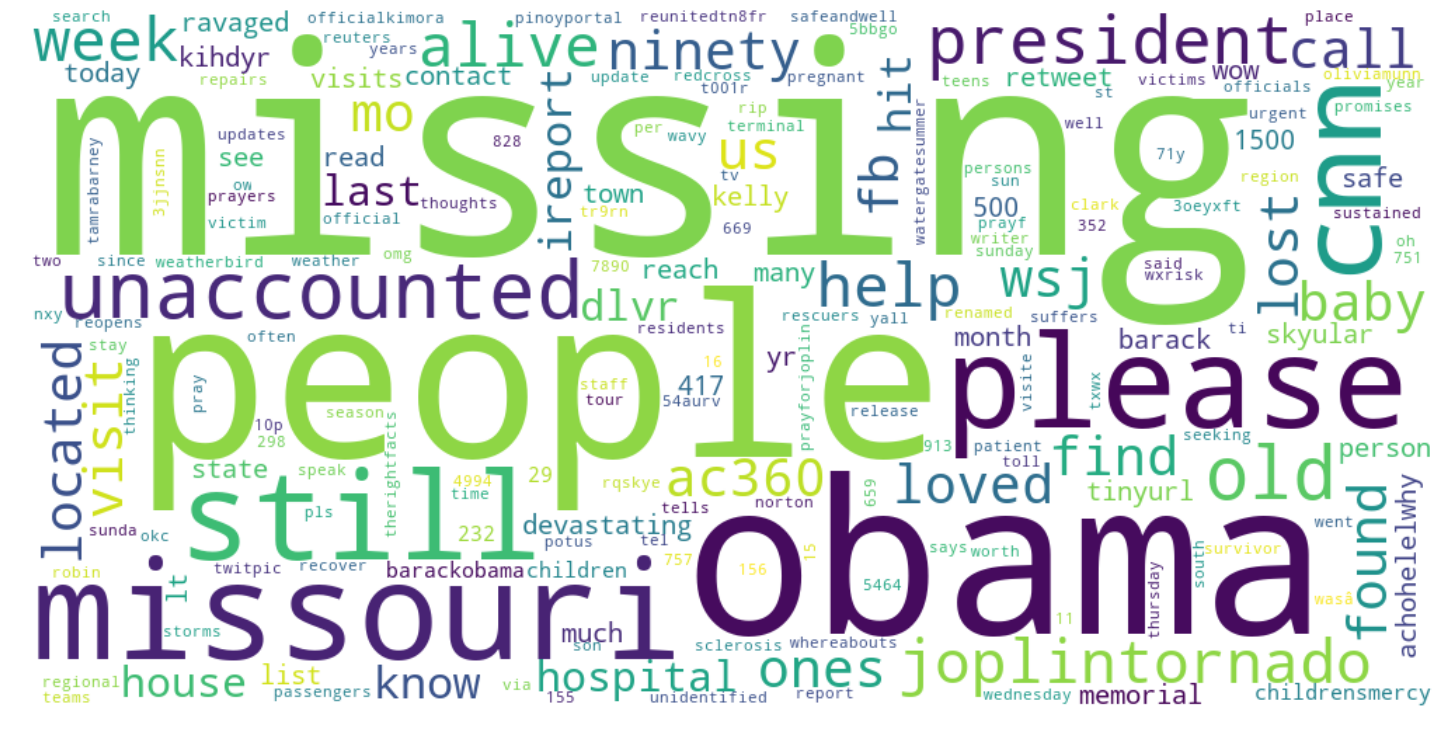

In [50]:
# make wordcloud
df = sandy_joplin
mask = (df.y == 6)  # select category
name = 'sandy_casualties'  # name to use for image output file
fig = make_wc(df, mask)
# fig.savefig(name+'.png', bbox_inches='tight');

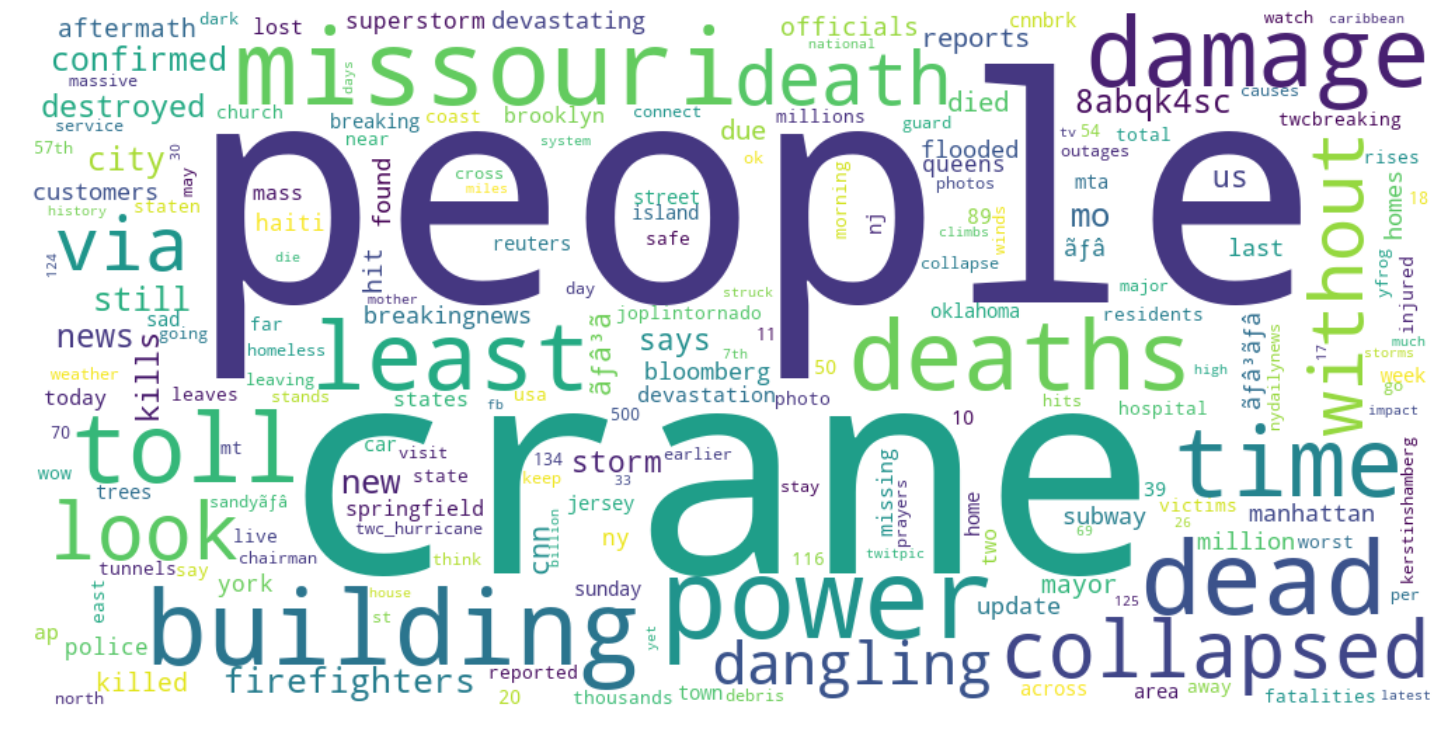

In [51]:
# make wordcloud
df = sandy_joplin
mask = (df.y == 1)  # select category
name = 'sandy_casualties'  # name to use for image output file
fig = make_wc(df, mask)
fig.savefig(name+'.png', bbox_inches='tight');

In [54]:
michael.tweet = michael.text

C:\Users\pauls\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


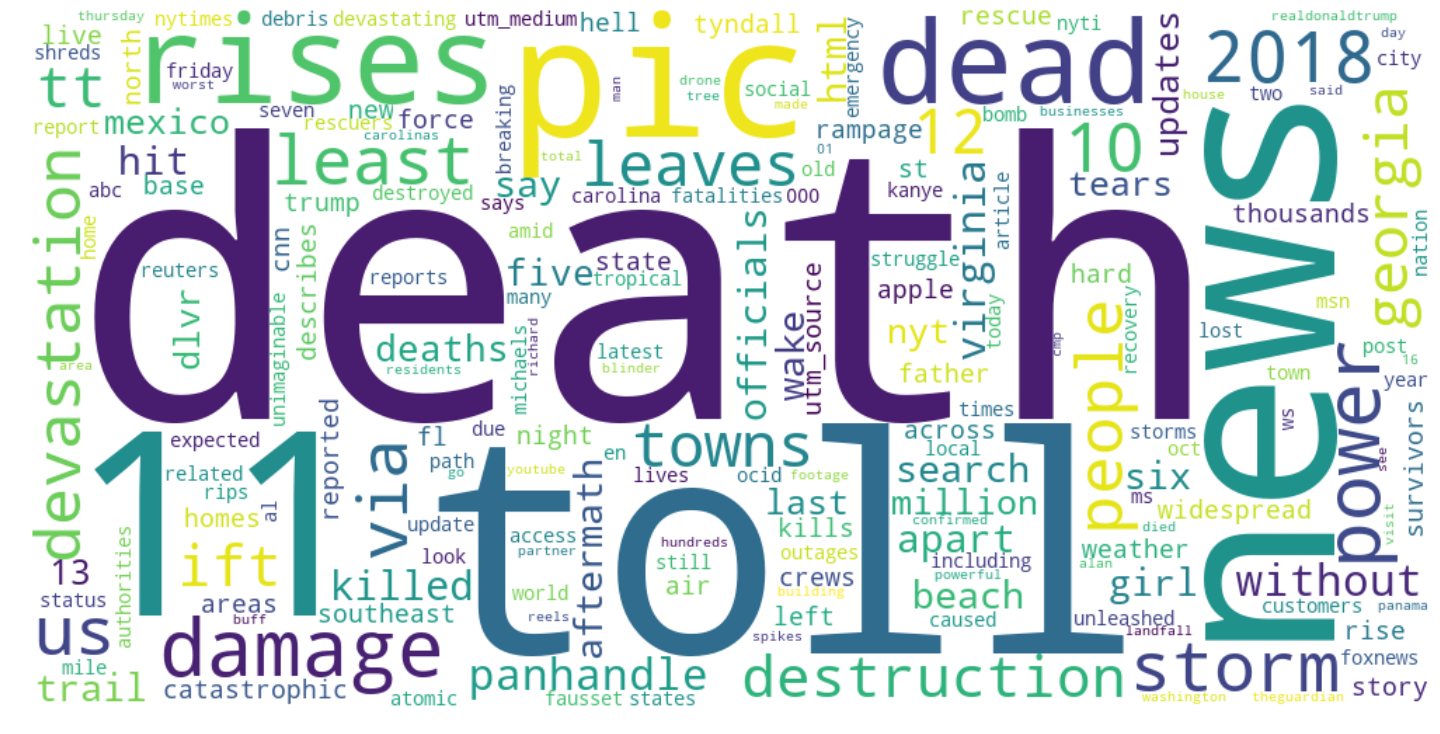

In [55]:
# make wordcloud
df = michael
mask = (df['pred'] == 1)  # select category
name = 'michael_casualties'  # name to use for image output file
fig = make_wc(df, mask)
fig.savefig(name+'.png', bbox_inches='tight');

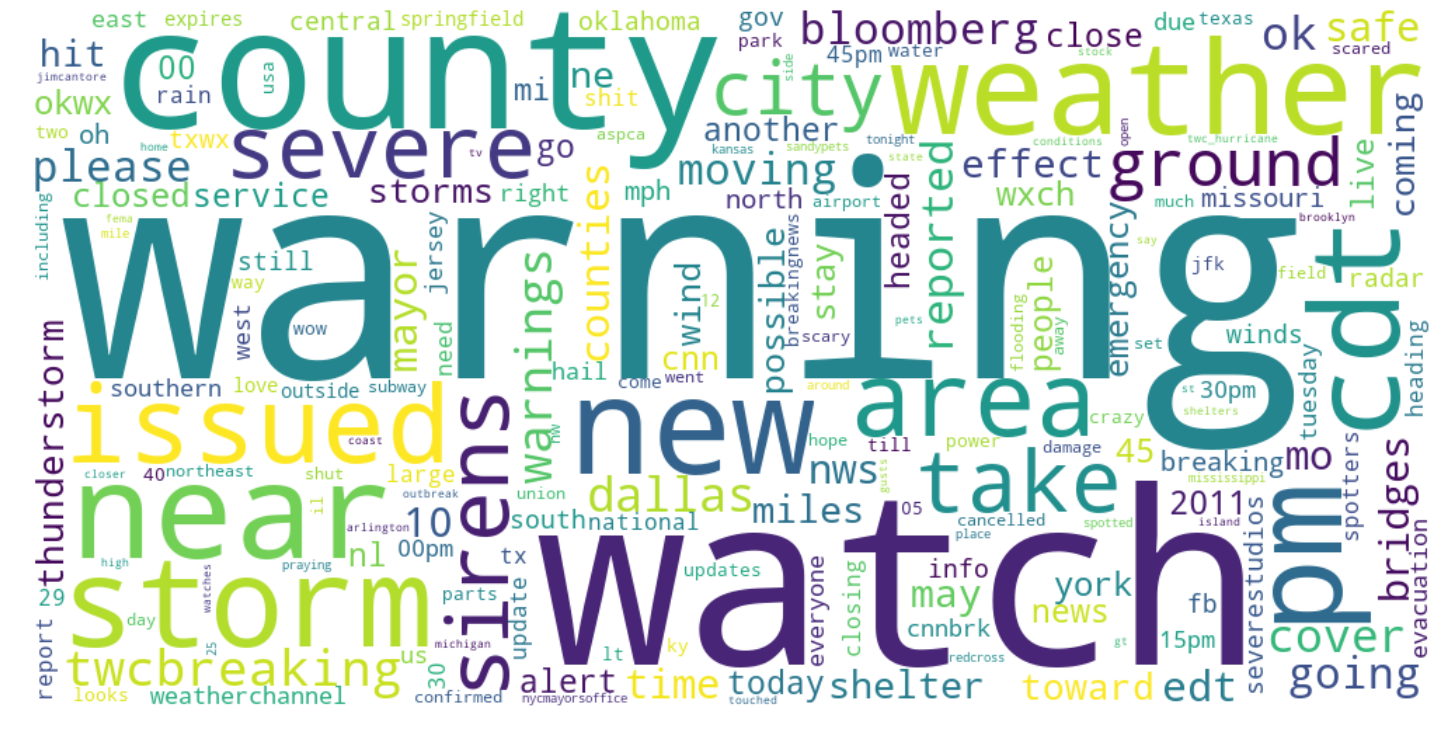

In [56]:
# make wordcloud
df = sandy_joplin
mask = (df.y == 2)  # select category
name = 'sandy_advice'  # name to use for image output file
fig = make_wc(df, mask)
fig.savefig(name+'.png', bbox_inches='tight');

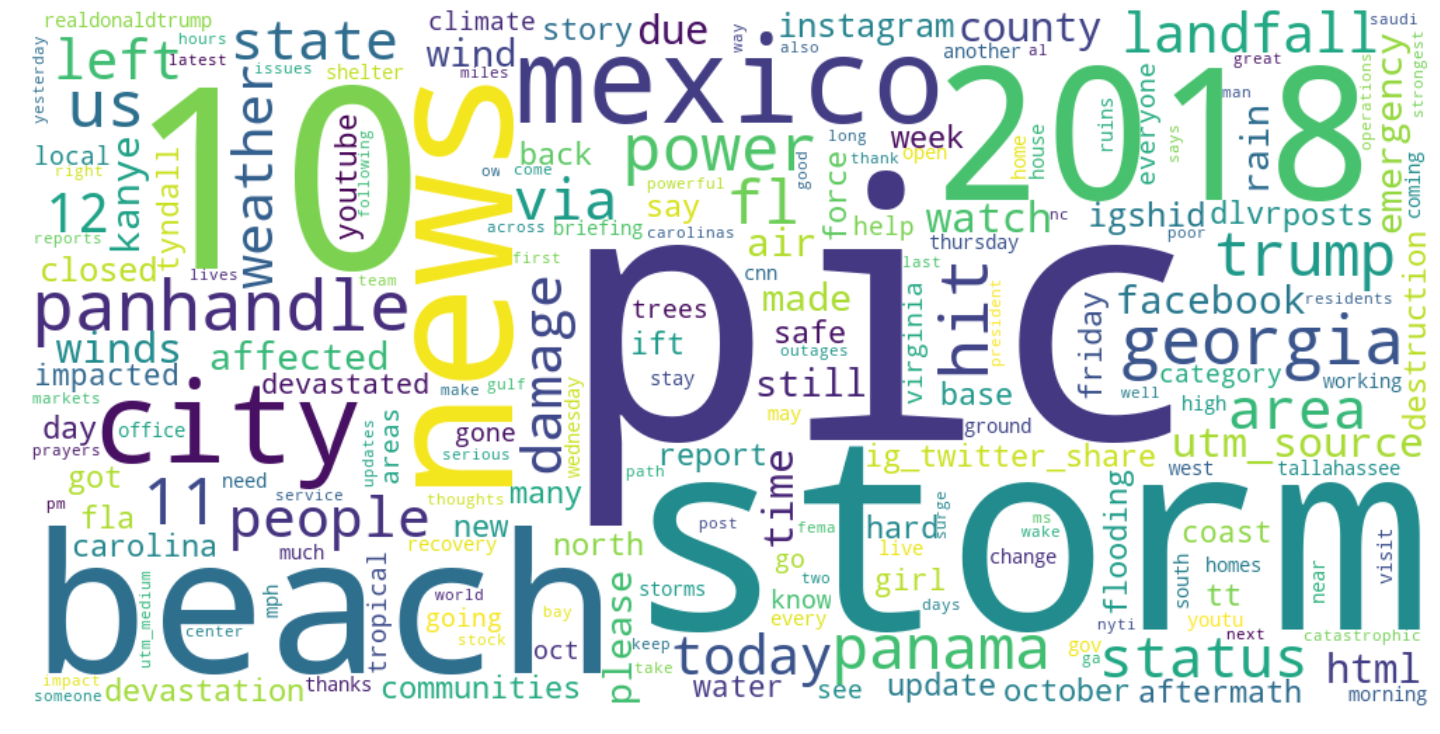

In [57]:
# make wordcloud
df = michael
mask = (df['pred'] == 2)  # select category
name = 'michael_advice'  # name to use for image output file
fig = make_wc(df, mask)
fig.savefig(name+'.png', bbox_inches='tight');

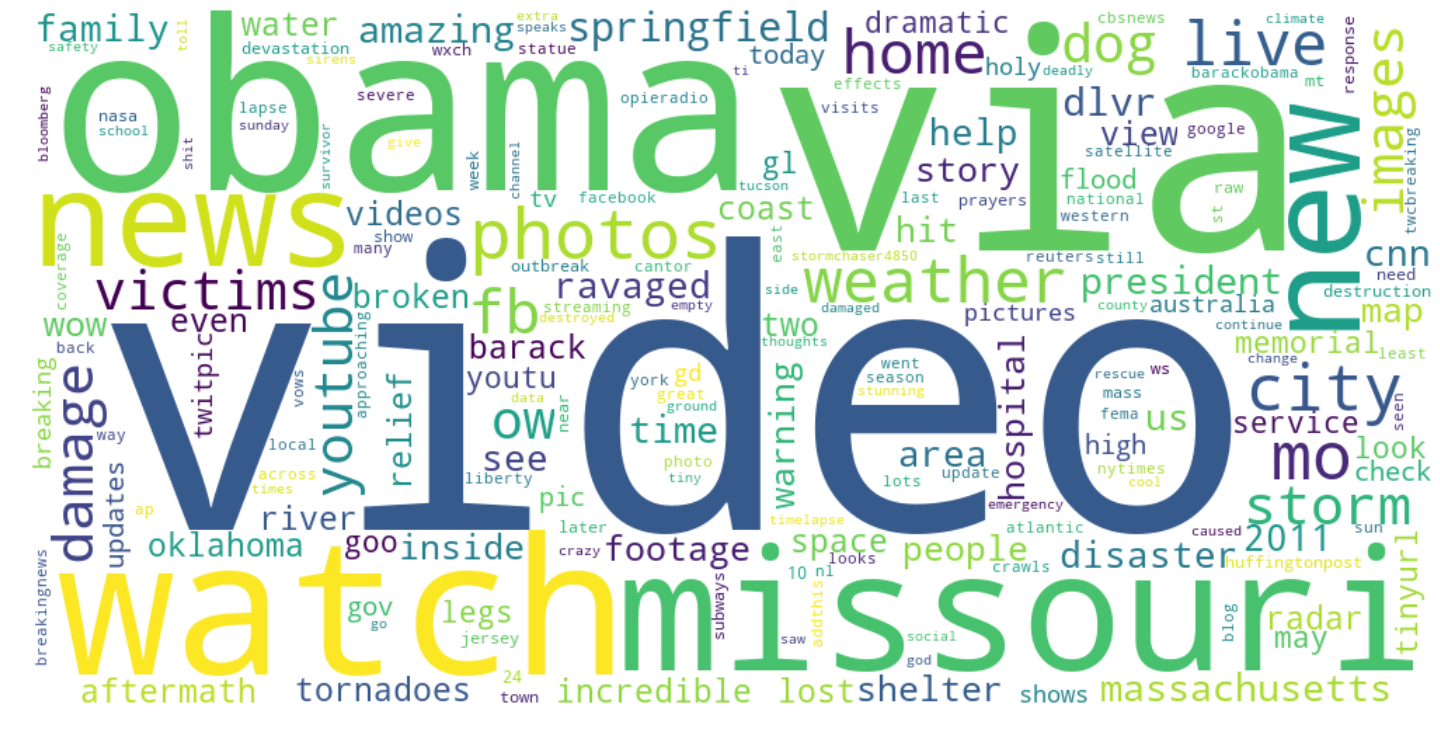

In [58]:
# make wordcloud
df = sandy_joplin
mask = (df.y == 4)  # select category
name = 'sandy_infosource'  # name to use for image output file
fig = make_wc(df, mask)
fig.savefig(name+'.png', bbox_inches='tight');

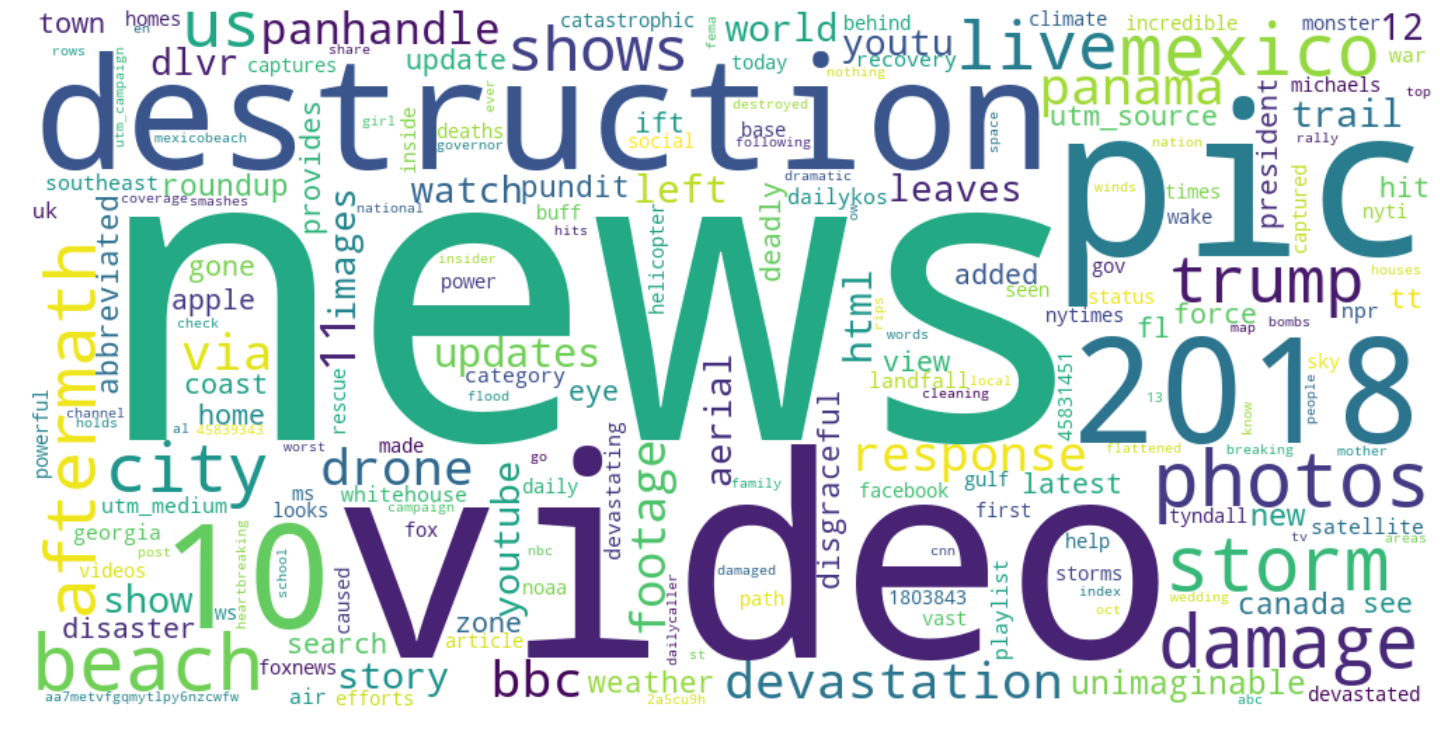

In [59]:
# make wordcloud
df = michael
mask = (df['pred'] == 4)  # select category
name = 'michael_infosource'  # name to use for image output file
fig = make_wc(df, mask)
fig.savefig(name+'.png', bbox_inches='tight');

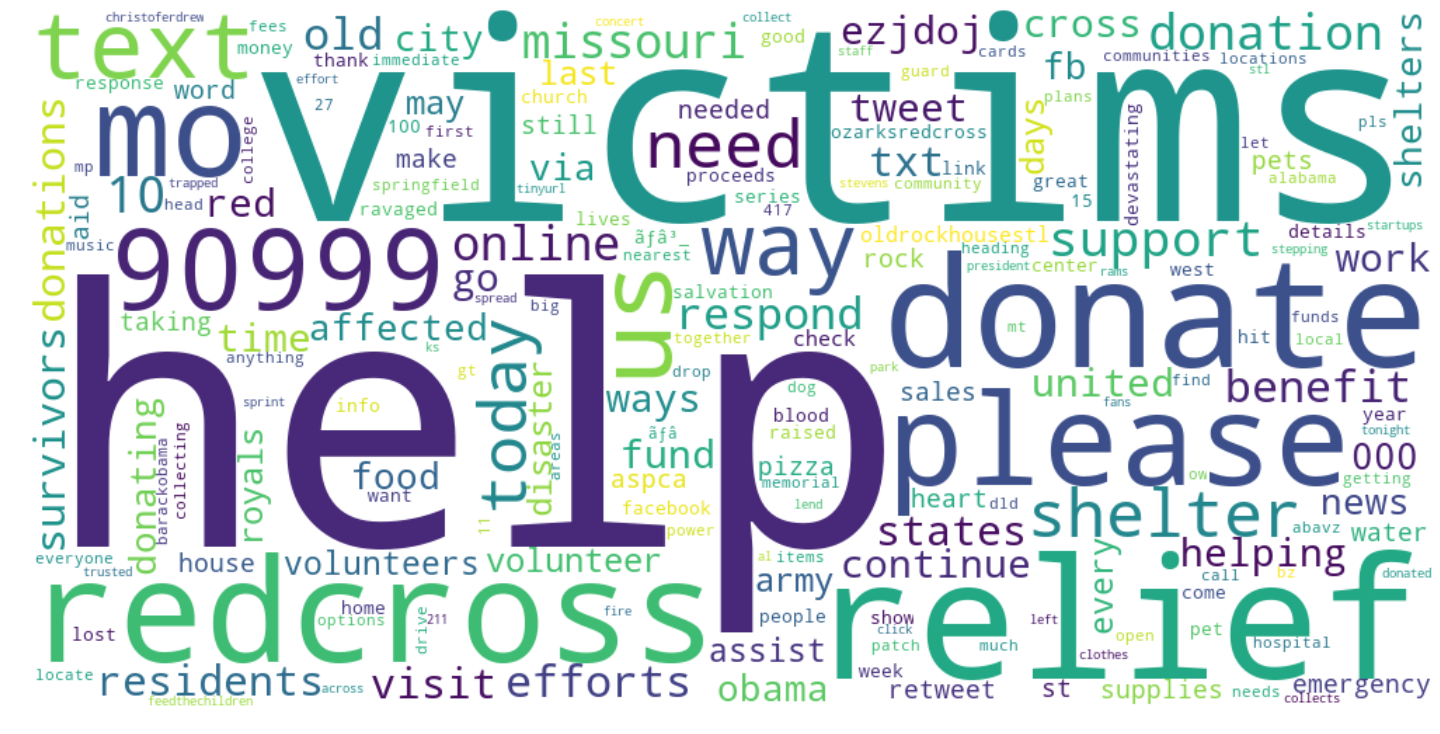

In [60]:
# make wordcloud
df = sandy_joplin
mask = (df.y == 5)  # select category
name = 'sandy_donations'  # name to use for image output file
fig = make_wc(df, mask)
fig.savefig(name+'.png', bbox_inches='tight');

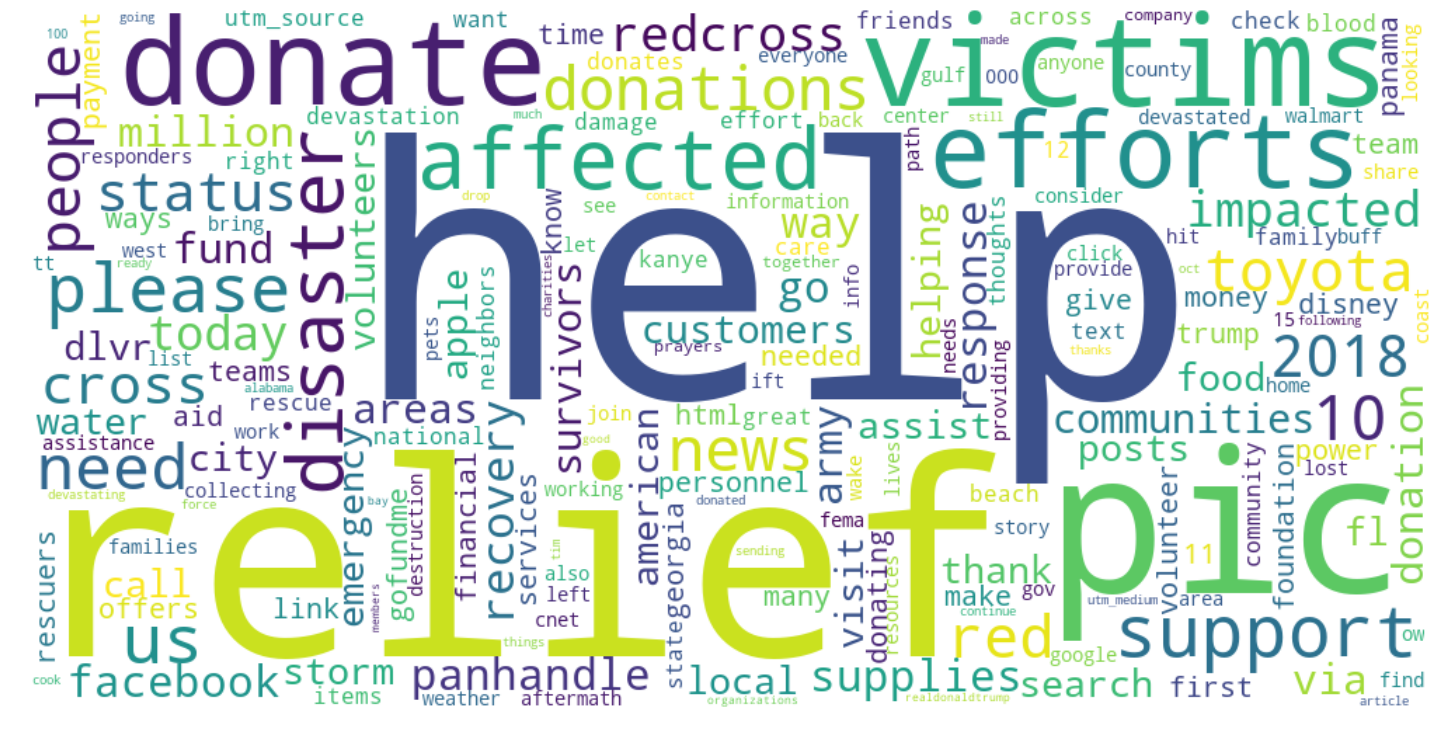

In [61]:
# make wordcloud
df = michael
mask = (df['pred'] == 5)  # select category
name = 'michael_donations'  # name to use for image output file
fig = make_wc(df, mask)
fig.savefig(name+'.png', bbox_inches='tight');